In [114]:
from keras.models import load_model
from keras.preprocessing.image import  load_img, image, ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential
import numpy as np
from lime.lime_image import LimeImageExplainer
from lime.wrappers.scikit_image import SegmentationAlgorithm
from skimage.segmentation import mark_boundaries
import os

In [185]:
cwd =  os.path.abspath('')

model = load_model(cwd + "/model_11-11-2019_hyperas.h5")
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [186]:
random_seed = 0
segmentation_fn = SegmentationAlgorithm('quickshift', kernel_size=4,
                                                    max_dist=200, ratio=0.2,
                                                    random_seed=random_seed)

#segmentation_fn = SegmentationAlgorithm('felzenszwalb', scale=1,
                                                    #sigma=0.8, min_size=20)

In [227]:
path = os.getcwd() + '\\data\\test\\PNEUMONIA\\person47_virus_99.jpeg'

path = os.getcwd() + '\\Pneumonia-right-middle-lobe-4.jpg'

# this one has good results when setting min_weight to capture only the heaviest weighted superpixel
path = os.getcwd() + '\\Pneumonia-CXR.png'

path = os.getcwd() + '\\76052f7902246ff862f52f5d3cd9cd_big_gallery.jpg'

path = os.getcwd() + '\\xray-chest-pneumonia.jpg'

test_image = load_img(path, target_size=(255,255,3))
test_image = image.img_to_array(test_image)
test_image = test_image * (1. / 255)
test_image = np.expand_dims(test_image, axis=0)
explainer = LimeImageExplainer()

In [232]:
explanation = explainer.explain_instance(test_image[0], model.predict_proba, labels=["NORMAL", "PNEUMONIA"], 
                                         top_labels=2, num_samples=100, random_seed=0, segmentation_fn = segmentation_fn)

[[1]]


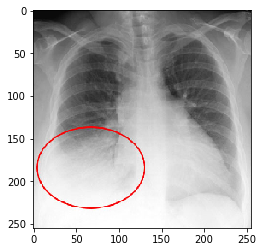

In [233]:
print(model.predict_classes(test_image))

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True,hide_rest=False, num_features=100,
                                           min_weight=1e-5)
plt.imshow(mark_boundaries(temp, mask))
plt.show()

In [234]:
explanation.local_exp

{0: [(43, 7.2921043254680835e-06),
  (39, 6.926467931100376e-06),
  (44, -5.381741413341324e-06),
  (41, 5.296697489020958e-06),
  (19, -5.021724759241755e-06),
  (42, 4.966939681354847e-06),
  (26, 4.59912741401392e-06),
  (33, 4.476639888643179e-06),
  (7, -3.528559436494436e-06),
  (27, -3.474715689431536e-06),
  (9, -3.315953986420994e-06),
  (36, 3.166417095693394e-06),
  (0, 3.0899735902853664e-06),
  (31, -3.0032429263969306e-06),
  (23, -2.9679602094335074e-06),
  (30, -2.93842917348955e-06),
  (8, 2.9123137932339586e-06),
  (3, -2.895719636965136e-06),
  (13, 2.856749114659149e-06),
  (11, 2.7124173115764257e-06),
  (12, 2.704886599366121e-06),
  (4, 2.6488190085561287e-06),
  (15, 2.5977045519551756e-06),
  (34, 2.5274378480959835e-06),
  (37, -2.2978419219977703e-06),
  (6, -2.296040441839698e-06),
  (29, -2.2771552275144043e-06),
  (2, -2.2667446411425072e-06),
  (49, -2.222355502411321e-06),
  (18, -2.0021779988703366e-06),
  (20, 1.8504172274207602e-06),
  (1, 1.848327247